In [1]:
import cnn3
from cnn3 import torch, optim,nn
import torch.nn.functional as F
from cnn3 import CIFAR100
from cnn3 import tqdm
from cnn3 import np

from telegramBot import Terminator
import matplotlib.pyplot as plt

from telegramBot import Terminator

In [2]:
class BCNN3(nn.Module):
	def __init__(self, alpha, beta, gamma, learning_rate, momentum, nesterov, dataset, 
				 epochs, every_print = 512, training_size = 50000):
		
		super().__init__()
		self.dataset = dataset
		self.learning_rate = learning_rate
		self.momentum = momentum
		self.nesterov = nesterov
		self.alphas = alpha
		self.betas = beta
		self.gammas = gamma
		self.alpha = self.alphas[0]
		self.beta = self.betas[0]
		self.gamma = self.gammas[0]
		self.activation = F.relu
		self.epochs = epochs
		self.every_print = every_print - 1 # assumed power of 2, -1 to make the mask
		self.track_size = int( training_size / batch_size / every_print ) 

		self.layer1  = nn.Conv2d(3, 64, (3,3), padding = 'same')
		self.layer2  = nn.BatchNorm2d(64)
		self.layer3  = nn.Conv2d(64, 64, (3,3), padding = 'same')
		self.layer4  = nn.BatchNorm2d(64)
		self.layer5  = nn.MaxPool2d((2,2), stride = (2,2))

		self.layer6  = nn.Conv2d(64, 128, (3,3), padding = 'same')
		self.layer7  = nn.BatchNorm2d(128)
		self.layer8  = nn.Conv2d(128, 128, (3,3), padding = 'same')
		self.layer9  = nn.BatchNorm2d(128)
		self.layer10 = nn.MaxPool2d((2,2), stride = (2,2))

		self.layerb11 = nn.Linear(8*8*128, 256)
		self.layerb12 = nn.BatchNorm1d(256)
		self.layerb13 = nn.Dropout(0.5)
		self.layerb14 = nn.Linear(256, 256)
		self.layerb15 = nn.BatchNorm1d(256)
		self.layerb16 = nn.Dropout(0.5)
		self.layerb17 = nn.Linear(256, self.dataset.num_c1)

		self.layer11 = nn.Conv2d(128, 256, (3,3), padding = 'same')
		self.layer12 = nn.BatchNorm2d(256)
		self.layer13 = nn.Conv2d(256, 256, (3,3), padding = 'same')
		self.layer14 = nn.BatchNorm2d(256)
		self.layer15 = nn.MaxPool2d((2,2), stride = (2,2))

		self.layerb21 = nn.Linear(4*4*256, 512)
		self.layerb22 = nn.BatchNorm1d(512)
		self.layerb23 = nn.Dropout(0.5)
		self.layerb24 = nn.Linear(512, 512)
		self.layerb25 = nn.BatchNorm1d(512)
		self.layerb26 = nn.Dropout(0.5)
		self.layerb27 = nn.Linear(512, self.dataset.num_c2)

		self.layer16 = nn.Conv2d(256, 512, (3,3), padding = 'same')
		self.layer17 = nn.BatchNorm2d(512)
		self.layer18 = nn.Conv2d(512, 512, (3,3), padding = 'same')
		self.layer19 = nn.BatchNorm2d(512)
		self.layer20 = nn.MaxPool2d((2,2), stride = (2,2))

		self.layerb31 = nn.Linear(2*2*512, 1024)
		self.layerb32 = nn.BatchNorm1d(1024)
		self.layerb33 = nn.Dropout(0.5)
		self.layerb34 = nn.Linear(1024, 1024)
		self.layerb35 = nn.BatchNorm1d(1024)
		self.layerb36 = nn.Dropout(0.5)
		self.layerb37 = nn.Linear(1024, self.dataset.num_c3)

		self.optimizer = optim.SGD(self.parameters(), lr = self.learning_rate[0], 
								   momentum = self.momentum, nesterov = self.nesterov)
		self.criterion = nn.CrossEntropyLoss()


	def forward(self, x):

		# block 1
		z = self.layer1(x)
		z = self.activation(z)
		z = self.layer2(z)
		z = self.layer3(z)
		z = self.activation(z)
		z = self.layer4(z)
		z = self.layer5(z)

		# block 2
		z = self.layer6(z)
		z = self.activation(z)
		z = self.layer7(z)
		z = self.layer8(z)
		z = self.activation(z)
		z = self.layer9(z)
		z = self.layer10(z)

		# branch 1
		b1 = torch.flatten(z, start_dim = 1)
		b1 = self.layerb11(b1)
		b1 = self.activation(b1)
		b1 = self.layerb12(b1)
		b1 = self.layerb13(b1)
		b1 = self.layerb14(b1)
		b1 = self.activation(b1)
		b1 = self.layerb15(b1)
		b1 = self.layerb16(b1)
		b1 = self.layerb17(b1)

		# block 3
		z = self.layer11(z)
		z = self.activation(z)
		z = self.layer12(z)
		z = self.layer13(z)
		z = self.activation(z)
		z = self.layer14(z)
		z = self.layer15(z)
		
		# branch 2
		b2 = torch.flatten(z, start_dim = 1)
		b2 = self.layerb21(b2)
		b2 = self.activation(b2)
		b2 = self.layerb22(b2)
		b2 = self.layerb23(b2)
		b2 = self.layerb24(b2)
		b2 = self.activation(b2)
		b2 = self.layerb25(b2)
		b2 = self.layerb26(b2)
		b2 = self.layerb27(b2)

		# block 4
		z = self.layer16(z)
		z = self.activation(z)
		z = self.layer17(z)
		z = self.layer18(z)
		z = self.activation(z)
		z = self.layer19(z)
		z = self.layer20(z)

		# branch 3
		b3 = torch.flatten(z, start_dim = 1)
		b3 = self.layerb31(b3)
		b3 = self.activation(b3)
		b3 = self.layerb32(b3)
		b3 = self.layerb33(b3)
		b3 = self.layerb34(b3)
		b3 = self.activation(b3)
		b3 = self.layerb35(b3)
		b3 = self.layerb36(b3)
		b3 = self.layerb37(b3)
		
		
		return b1, b2, b3


	def update_training_params(self, epoch):
		if epoch == 13:
			self.alpha = self.alphas[1]
			self.beta = self.betas[1]
			self.gamma = self.gammas[1]
		elif epoch == 23:
			self.alpha = self.alphas[2]
			self.beta = self.betas[2]
			self.gamma = self.gammas[2]
		elif epoch == 33:
			self.alpha = self.alphas[3]
			self.beta = self.betas[3]
			self.gamma = self.gammas[3]
		elif epoch == 56:
			self.optimizer.param_groups[0]['lr'] = self.learning_rate[1]
		elif epoch == 71:
			self.optimizer.param_groups[0]['lr'] = self.learning_rate[2]


	def predict_and_learn(self, batch, labels):
		self.optimizer.zero_grad()
		predict = self(batch)
		loss =  self.alpha * self.criterion(predict[0], labels[:,0]) + \
				self.beta * self.criterion(predict[1], labels[:,1]) + \
				self.gamma * self.criterion(predict[2], labels[:,2])

		loss.backward()
		self.optimizer.step()

		return loss

    
	def train_model(self, verbose = False):
		self.train()
		
		for epoch in tqdm(np.arange(self.epochs), desc="Training: "):
			self.update_training_params(epoch)

			if verbose:
				running_loss = 0.
			
			for iter, (batch, labels) in enumerate(self.dataset.trainloader):
				loss = self.predict_and_learn(batch, labels)

				if verbose:
					running_loss += (loss.item() - running_loss) / (iter+1)
					if (iter + 1) & self.every_print == 0:
						print(f'[{epoch + 1}] loss: {running_loss :.3f}')
						running_loss = 0.0

    
	def train_track(self, filename = None):
		self.train()
		
		self.loss_track = torch.zeros(self.epochs * self.track_size)
		self.accuracy_track = torch.zeros(self.epochs * self.track_size, self.dataset.class_levels)
		num_push = 0
		
		for epoch in tqdm(np.arange(self.epochs), desc="Training: "):

			self.update_training_params(epoch)

			running_loss = 0.
			
			for iter, (batch, labels) in enumerate(self.dataset.trainloader):
				loss = self.predict_and_learn(batch, labels)

				running_loss += (loss.item() - running_loss) / (iter+1)
				if (iter + 1) & self.every_print == 0:
					self.loss_track[num_push] = running_loss
					self.accuracy_track[num_push, :] = self.test(mode = "train")
					num_push += 1
					running_loss = 0.0

		self.plot_training_loss(filename+"_train_loss.pdf")
		self.plot_test_accuracy(filename+"_test_accuracy_.pdf")


	def initialize_memory(self):
		self.correct_c1_pred = torch.zeros(self.dataset.num_c1)
		self.total_c1_pred = torch.zeros_like(self.correct_c1_pred)
		
		self.correct_c2_pred = torch.zeros(self.dataset.num_c2)
		self.total_c2_pred = torch.zeros_like(self.correct_c2_pred)
		
		self.correct_c3_pred = torch.zeros(self.dataset.num_c3)
		self.total_c3_pred = torch.zeros_like(self.correct_c3_pred)

		self.correct_c1_vs_c2_pred = torch.zeros(self.dataset.num_c1)
		self.total_c1_vs_c2_pred = torch.zeros_like(self.correct_c1_vs_c2_pred)

		self.correct_c2_vs_c3_pred = torch.zeros(self.dataset.num_c2)
		self.total_c2_vs_c3_pred = torch.zeros_like(self.correct_c2_vs_c3_pred)

		self.correct_c1_vs_c3_pred = torch.zeros(self.dataset.num_c1)
		self.total_c1_vs_c3_pred = torch.zeros_like(self.correct_c1_vs_c3_pred)

    
	def collect_test_performance(self):
		with torch.no_grad():
			for images, labels in self.dataset.testloader:
				predictions = self(images)
				predicted = torch.zeros(predictions[0].size(0), self.dataset.class_levels, dtype=torch.long)
				_, predicted[:,0] = torch.max(predictions[0], 1)
				_, predicted[:,1] = torch.max(predictions[1], 1)
				_, predicted[:,2] = torch.max(predictions[2], 1)

				for i in np.arange(predictions[0].size(0)):
					if labels[i,0] == predicted[i,0]:
						self.correct_c1_pred[labels[i,0]] += 1
						
					if labels[i,1] == predicted[i,1]:
						self.correct_c2_pred[labels[i,1]] += 1

					if labels[i,2] == predicted[i,2]:
						self.correct_c3_pred[labels[i,2]] += 1

					if predicted[i,1] == self.dataset.c3_to_c2(predicted[i,2]):
						self.correct_c2_vs_c3_pred[predicted[i,1]] += 1

					if predicted[i,0] == self.dataset.c3_to_c1(predicted[i,2]):
						self.correct_c1_vs_c3_pred[predicted[i,0]] += 1

					if predicted[i,0] == self.dataset.c2_to_c1(predicted[i,1]):
						self.correct_c1_vs_c2_pred[predicted[i,0]] += 1
						
					self.total_c1_pred[labels[i,0]] += 1
					self.total_c2_pred[labels[i,1]] += 1
					self.total_c3_pred[labels[i,2]] += 1
					self.total_c1_vs_c3_pred[predicted[i,0]] += 1
					self.total_c1_vs_c2_pred[predicted[i,0]] += 1
					self.total_c2_vs_c3_pred[predicted[i,1]] += 1
					

	def test_results_to_text(self):
		str_bot = ""
		str = ""
		
		# accuracy for each class
		for i in np.arange(self.dataset.num_c1):
			accuracy_c1 = 100 * float(self.correct_c1_pred[i]) / self.total_c1_pred[i]
			str += f'Accuracy for class {self.dataset.labels_c1[i]:5s}: {accuracy_c1:.2f} %'
			str += '\n'
			
		str += '\n'
		
		for i in np.arange(self.dataset.num_c2):
			accuracy_c2 = 100 * float(self.correct_c2_pred[i]) / self.total_c2_pred[i]
			str += f'Accuracy for class {self.dataset.labels_c2[i]:5s}: {accuracy_c2:.2f} %'
			str += '\n'
			
		str += '\n'
		
		for i in np.arange(self.dataset.num_c3):
			accuracy_c3 = 100 * float(self.correct_c3_pred[i]) / self.total_c3_pred[i]
			str += f'Accuracy for class {self.dataset.labels_c3[i]:5s}: {accuracy_c3:.2f} %'
			str += '\n'
			
		# accuracy for the whole dataset
		str += '\n'

		str += f'Accuracy on c1: {(100 * self.correct_c1_pred.sum() / self.total_c1_pred.sum()):.2f} %'
		str += '\n'

		str_bot += f'Accuracy on c1: {(100 * self.correct_c1_pred.sum() / self.total_c1_pred.sum()):.2f} %'
		str_bot += '\n'

		str += f'Accuracy on c2: {(100 * self.correct_c2_pred.sum() / self.total_c2_pred.sum()):.2f} %'
		str += '\n'

		str_bot += f'Accuracy on c2: {(100 * self.correct_c2_pred.sum() / self.total_c2_pred.sum()):.2f} %'
		str_bot += '\n'

		str += f'Accuracy on c3: {(100 * self.correct_c3_pred.sum() / self.total_c3_pred.sum()):.2f} %'
		str += '\n'

		str_bot += f'Accuracy on c3: {(100 * self.correct_c3_pred.sum() / self.total_c3_pred.sum()):.2f} %'
		str_bot += '\n'

		str += '\n'
		str_bot += '\n'
		
		 
		str += f'Cross-accuracy c1 vs c2: {100 * float(self.correct_c1_vs_c2_pred.sum()) / self.total_c1_vs_c2_pred.sum():.2f} %'
		str += '\n'
		str += f'Cross-accuracy c2 vs c3: {100 * float(self.correct_c2_vs_c3_pred.sum()) / self.total_c2_vs_c3_pred.sum():.2f} %'
		str += '\n'
		str += f'Cross-accuracy c1 vs c3: {100 * float(self.correct_c1_vs_c3_pred.sum()) / self.total_c1_vs_c3_pred.sum():.2f} %'
		str += '\n\n'
 
		str_bot += f'Cross-accuracy c1 vs c2: {100 * float(self.correct_c1_vs_c2_pred.sum()) / self.total_c1_vs_c2_pred.sum():.2f} %'
		str_bot += '\n'
		str_bot += f'Cross-accuracy c2 vs c3: {100 * float(self.correct_c2_vs_c3_pred.sum()) / self.total_c2_vs_c3_pred.sum():.2f} %'
		str_bot += '\n'
		str_bot += f'Cross-accuracy c1 vs c3: {100 * float(self.correct_c1_vs_c3_pred.sum()) / self.total_c1_vs_c3_pred.sum():.2f} %'
		str_bot += '\n'

		# cross classes accuracy (tree)
		for i in np.arange(self.dataset.num_c1):
			accuracy_c1_c2 = 100 * float(self.correct_c1_vs_c2_pred[i]) / self.total_c1_vs_c2_pred[i]
			str += f'Cross-accuracy {self.dataset.labels_c1[i]:9s} vs c2: {accuracy_c1_c2:.2f} %'
			str += '\n'
			
		str += '\n'
		
		for i in np.arange(self.dataset.num_c2):
			accuracy_c2_c3 = 100 * float(self.correct_c2_vs_c3_pred[i]) / self.total_c2_vs_c3_pred[i]
			str += f'Cross-accuracy {self.dataset.labels_c2[i]:7s} vs c3: {accuracy_c2_c3:.2f} %'
			str += '\n'
			
		str += '\n'
		
		for i in np.arange(self.dataset.num_c1):
			accuracy_c1_c3 = 100 * float(self.correct_c1_vs_c3_pred[i]) / self.total_c1_vs_c3_pred[i]
			str += f'Cross-accuracy {self.dataset.labels_c1[i]:9s} vs c3: {accuracy_c1_c3:.2f} %'
			str += '\n'
			

		return str, str_bot


	def barplot(self, x, accuracy, labels, title):
		plt.bar(x, accuracy, tick_label = labels)
		plt.xlabel("Classes")
		plt.ylabel("Accuracy")
		plt.title(title)
		plt.show();

	def plot_test_results(self):
		# accuracy for each class
		accuracy_c1 = torch.empty(self.dataset.num_c1)
		for i in np.arange(self.dataset.num_c1):
			accuracy_c1[i] = float(self.correct_c1_pred[i]) / self.total_c1_pred[i]
		self.barplot(np.arange(self.dataset.num_c1), accuracy_c1, self.dataset.labels_c1, "Accuracy on the first level")

		accuracy_c2 = torch.empty(self.dataset.num_c2 + 1)
		for i in np.arange(self.dataset.num_c2):
			accuracy_c2[i] = float(self.correct_c2_pred[i]) / self.total_c2_pred[i]
		accuracy_c2[self.dataset.num_c2] = self.correct_c2_pred.sum() / self.total_c2_pred.sum()
		self.barplot(np.arange(self.dataset.num_c2 + 1), accuracy_c2, (*self.dataset.labels_c2, 'overall'), "Accuracy on the second level")

		accuracy_c3 = torch.empty(self.dataset.num_c3 + 1)
		for i in np.arange(self.dataset.num_c3):
			accuracy_c3[i] = float(self.correct_c3_pred[i]) / self.total_c3_pred[i]
		accuracy_c3[self.dataset.num_c3] = self.correct_c3_pred.sum() / self.total_c3_pred.sum()
		self.barplot(np.arange(self.dataset.num_c3 + 1), accuracy_c3, (*self.dataset.labels_c3, 'overall'), "Accuracy on the third level")

    
	def test(self, mode = "print", filename = ""):
		self.initialize_memory()
		self.eval()

		self.collect_test_performance()

		match mode:
			case "plot":
				self.plot_test_results()
			case "print":
				msg, msg_bot = self.test_results_to_text()
				print(msg)
				return msg_bot
			case "write":
				msg, msg_bot = self.test_results_to_text()
				with open(filename+"_test_performance.txt", 'w') as f:
					f.write(msg)
				return msg_bot
			case "train":
				accuracy_c1 = self.correct_c1_pred.sum() / self.total_c1_pred.sum()
				accuracy_c2 = self.correct_c2_pred.sum() / self.total_c2_pred.sum()
				accuracy_c3 = self.correct_c3_pred.sum() / self.total_c3_pred.sum()

				self.train()

				return torch.tensor([accuracy_c1, accuracy_c2, accuracy_c3])
			case _:
				raise AttributeError("Test mode not available")
		
    
	def plot_training_loss(self, filename = None):
		plt.figure(figsize=(12, 6))
		plt.plot(np.linspace(1, self.epochs, self.loss_track.size(0)), self.loss_track.numpy())
		plt.title("Training loss")
		plt.xlabel("Epochs")
		plt.ylabel("Error")
		plt.xticks(np.linspace(1, self.epochs, self.epochs)[0::2])
		if filename is not None:
			plt.savefig(filename, bbox_inches='tight')
		plt.show();

	def plot_test_accuracy(self, filename = None):
		plt.figure(figsize=(12, 6))
		plt.plot(np.linspace(1, self.epochs, self.accuracy_track.size(0)), self.accuracy_track[:, 0].numpy(), label = "First level")
		plt.plot(np.linspace(1, self.epochs, self.accuracy_track.size(0)), self.accuracy_track[:, 1].numpy(), label = "Second level")
		plt.plot(np.linspace(1, self.epochs, self.accuracy_track.size(0)), self.accuracy_track[:, 2].numpy(), label = "Third level")
		plt.title("Test accuracy")
		plt.xlabel("Epochs")
		plt.ylabel("Accuracy")
		plt.xticks(np.linspace(1, self.epochs, self.epochs)[0::2])
		plt.legend()
		if filename is not None:
			plt.savefig(filename, bbox_inches='tight')
		plt.show();

	def save_model(self, path):
		torch.save(self.state_dict(), path+".pt")

	def load_model(self, path):
		self.load_state_dict(torch.load(path)+".pt")
		self.eval()

	def num_param(self):
		return sum(p.numel() for p in self.parameters() if p.requires_grad)

	def write_configuration(self, filename, additional_info = "No"):
		msg = ""
		msg += "Epochs: " + str(self.epochs) + "\n\n"
		msg += "LR: " 
		for lr in self.learning_rate:
			msg += str(lr) + " "
		msg += "\n\n"
		msg += "Number of params: " + str(self.num_param()) + "\n\n"
		msg += "Additional info: " + additional_info
		
		with open(filename+"_configuration.txt", 'w') as f:
			f.write(msg)

In [3]:
alpha = [0.98, 0.1, 0.1, 0.]
beta = [0.01, 0.8, 0.2, 0.]
gamma = [0.01, 0.1, 0.7, 1.]
learning_rate = [1e-3, 2e-4, 5e-5]
momentum = 0.9
nesterov = True
epochs = 80
every_print = 64
batch_size = 128

In [4]:
bot = Terminator()
dataset = CIFAR100(batch_size)
cnn = BCNN3(alpha, beta, gamma, learning_rate, momentum, nesterov, dataset, epochs, every_print)

Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [6:36:09<00:00, 297.12s/it]


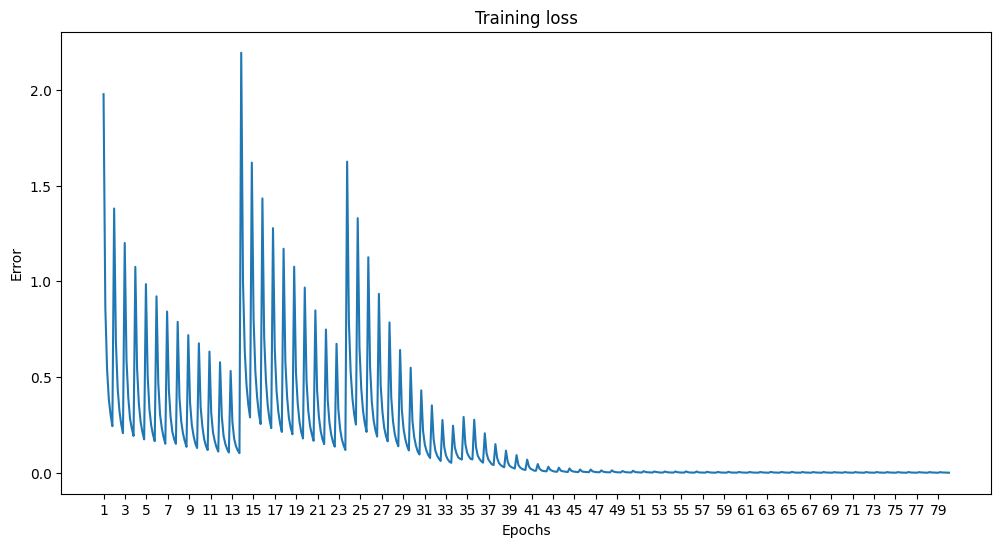

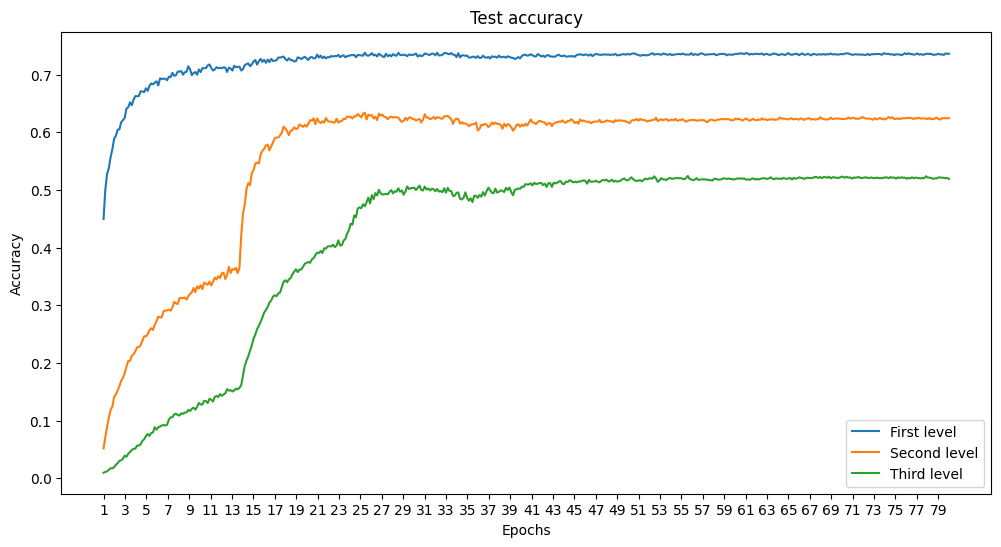

In [5]:
err = False
filename = "models/CIFAR100/B-CNN3"

try:
    cnn.train_track(filename)
    cnn.save_model(filename)
    msg = cnn.test(mode = "write", filename = filename)
    cnn.write_configuration(filename)
    
except Exception as errore:
    err = errore

if err is False:
    bot.sendMessage("Programma terminato correttamente\n\n\nPerformance:\n\n"+msg)
else:
    bot.sendMessage("Programma NON terminato correttamente\nTipo di errore: "+err.__class__.__name__+"\nMessaggio: "+str(err))
    raise err